In [130]:
import sys
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
import mne
import funcs4eeg as fe
import re
import imp
import ast
sys.path.insert(0, os.path.abspath('..'))
import behavior.func4behav as fb
imp.reload(fe)
imp.reload(fb)

<module 'behavior.func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [131]:
case='(5 | 6) & 8'
watch='1 fixation'
tmin = 0
tmax = 2.5

real_to_pick = [1, 3, 5, 9, 18]	
sham_to_pick = [6, 10, 11, 15, 16]
bands = [[8, 12], [12.5, 30], [30, 80]]
band_names = ['alpha', 'beta', 'gamma']

band_power = pd.DataFrame(columns=['band name', 'f low', 'f high', 'sham before', 
                                      'sham after', 'sham increase %', 'real before', 'real after', 'real increase %'])
band_power['band name'] = band_names
band_power['f low'] = [band[0] for band in bands]
band_power['f high'] = [band[1] for band in bands]

In [132]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # endo
    # behavior_before = behavior_before[behavior_before['type'] == 1]
    # behavior_after = behavior_after[behavior_after['type'] == 1]

    # exo
    # behavior_before = behavior_before[behavior_before['type'] == 2]
    # behavior_after = behavior_after[behavior_after['type'] == 2]

    # endo valid
    # behavior_before = behavior_before[(behavior_before['valid'] == 1) & (behavior_before['type'] == 1)]
    # behavior_after = behavior_after[(behavior_after['valid'] == 1) & (behavior_after['type'] == 1)]

    # exo valid
    # behavior_before = behavior_before[(behavior_before['valid'] == 1) & (behavior_before['type'] == 2)]
    # behavior_after = behavior_after[(behavior_after['valid'] == 1) & (behavior_after['type'] == 2)]

    # endo invalid
    # behavior_before = behavior_before[(behavior_before['valid'] == -1) & (behavior_before['type'] == 1)]
    # behavior_after = behavior_after[(behavior_after['valid'] == -1) & (behavior_after['type'] == 1)]

    # exo invalid
    behavior_before = behavior_before[(behavior_before['valid'] == -1) & (behavior_before['type'] == 2)]
    behavior_after = behavior_after[(behavior_after['valid'] == -1) & (behavior_after['type'] == 2)]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

In [133]:
for band_name in band_names:
    fmin = band_power[band_power['band name'] == band_name]['f low'].values[0]
    fmax = band_power[band_power['band name'] == band_name]['f high'].values[0]

    real_before = list()
    real_after = list()
    real_increase = list()
    for subject_id in real_to_pick:
        power_before, power_after = fe.pipeline_band_power(subject_id=subject_id, case=case, watch=watch, fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax)
        real_before.append(power_before)
        real_after.append(power_after)
        real_increase.append((power_after - power_before)/power_before)
    band_power.loc[band_power['band name'] == band_name, 'real before'] = str(real_before)
    band_power.loc[band_power['band name'] == band_name, 'real after'] = str(real_after)
    band_power.loc[band_power['band name'] == band_name, 'real increase %'] = str(real_increase)


    sham_before = list()
    sham_after = list()
    sham_increase = list()
    for subject_id in sham_to_pick:
        power_before, power_after = fe.pipeline_band_power(subject_id=subject_id, case=case, watch=watch, fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax)
        sham_before.append(power_before)
        sham_after.append(power_after)
        sham_increase.append((power_after - power_before)/power_before)
    band_power.loc[band_power['band name'] == band_name, 'sham before'] = str(sham_before)
    band_power.loc[band_power['band name'] == band_name, 'sham after'] = str(sham_after)
    band_power.loc[band_power['band name'] == band_name, 'sham increase %'] = str(sham_increase)
    

In [134]:
display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))

,subject id,Real stimulation,RT mean shorten,RT median shorten,RT mean shorten %,RT std decrease,RT median shorten %
0,1,1,23.465556,19.345,9.864036,-1.433807,8.085853
1,2,0,11.879091,21.04,3.585147,1.51492,6.29469
2,3,1,77.678182,59.51,24.46627,12.248074,19.629898
3,4,1,-116.458333,-30.14,-46.881185,-153.896813,-12.969019
4,5,1,51.919722,75.855,13.806397,-4.672344,20.152228
5,6,0,-36.698182,-30.8,-13.575327,-17.683811,-11.781356
6,7,0,-32.512197,-7.615,-11.412849,-41.986654,-2.642813
7,8,0,41.326061,30.655,13.576087,2.320842,10.369907
8,9,1,74.533788,86.4,17.780926,-2.313027,20.38457
9,10,0,13.66875,11.915,4.79961,-7.013254,4.272524


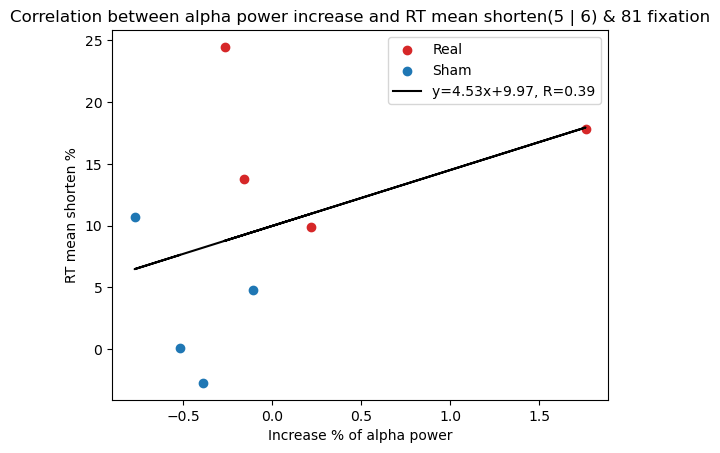

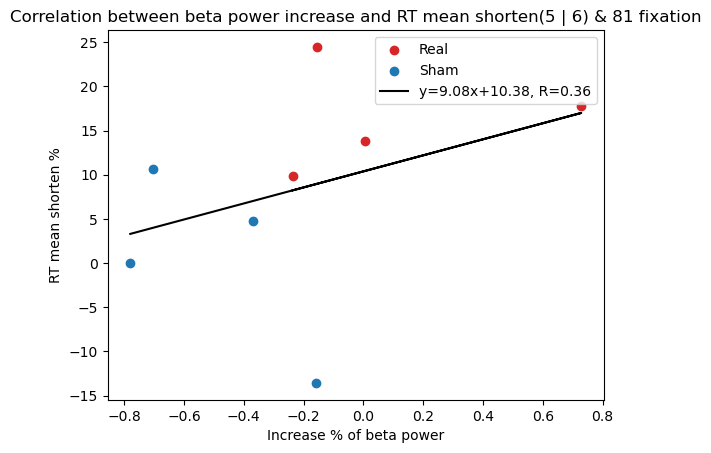

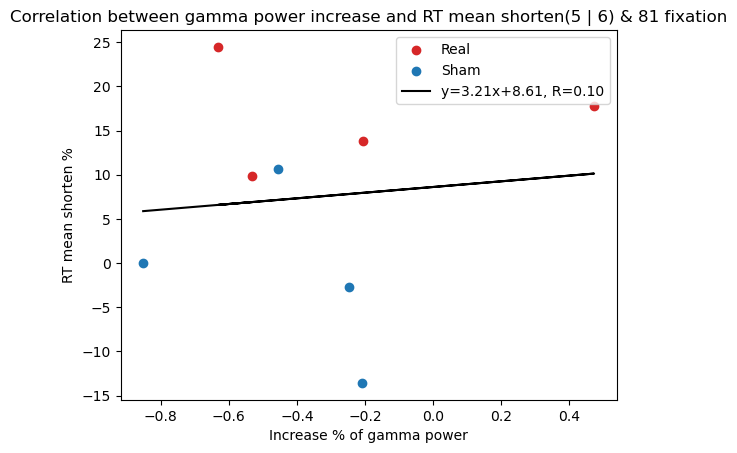

In [135]:
compare_objects = ['alpha', 'beta', 'gamma']

for compare_object in compare_objects:
    x_real = np.array(band_power.loc[band_power['band name'] == compare_object, 'real increase %'].apply(ast.literal_eval).values[0])
    rows = behavior_compare[behavior_compare['subject id'].isin(real_to_pick)]
    y_real = rows['RT mean shorten %'].values
    
    x_sham = np.array(band_power.loc[band_power['band name'] == compare_object, 'sham increase %'].apply(ast.literal_eval).values[0])
    rows = behavior_compare[behavior_compare['subject id'].isin(sham_to_pick)]
    y_sham = rows['RT mean shorten %'].values

    # Remove the max value
    max_index = np.argmax(x_real)
    x_real = np.delete(x_real, max_index)
    y_real = np.delete(y_real, max_index)
    max_index = np.argmax(x_sham)
    x_sham = np.delete(x_sham, max_index)
    y_sham = np.delete(y_sham, max_index)
    
    # combine all data
    x_all = np.concatenate([x_real, x_sham])
    y_all = np.concatenate([y_real, y_sham])
    
    # perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_all.tolist(), y_all.tolist())

    # plot data and regression line
    plt.figure()
    plt.scatter(x_real, y_real, color='#d62728', label='Real')
    plt.scatter(x_sham, y_sham, color='#1f77b4', label='Sham')
    plt.plot(x_all, intercept + slope*x_all, 'k', label='y={:.2f}x+{:.2f}, R={:.2f}'.format(slope, intercept, r_value))
    plt.title('Correlation between {} power increase and RT mean shorten'.format(compare_object) + case + watch)
    plt.xlabel('Increase % of {} power'.format(compare_object))
    plt.ylabel('RT mean shorten %')
    plt.legend()
    plt.show()


In [136]:
print(f"x_all shape: {x_all.shape}, contents: {x_all}")
print(f"y_all shape: {y_all.shape}, contents: {y_all}")

x_all shape: (8,), contents: [-0.53092651 -0.63048285 -0.20596295  0.47257212 -0.20775855 -0.24809332
 -0.45516937 -0.85136265]
y_all shape: (8,), contents: [9.864036132479535 24.466269614019016 13.806396808982125 17.7809256709645
 -13.57532712543255 -2.740932935651562 10.672798432062477
 0.05457539474583642]
